# Препроцессинг


In [75]:
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import stats
from scipy.stats import norm, skew 
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [66]:
df = pd.read_excel("data/train.xlsx", index_col=0)
df

,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
Shrt_Desc,,,,,,,,,,,,,,,,,,,,,
"BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY",4.70,393,12.00,6.00,3.90,73.40,5.2,13.75,651.0,47.50,...,3.0,1.267,1.429,2.186,0.0,2.0,1 tbsp,15.0,.5 oz,0.0
"HEARTS OF PALM,CANNED",90.20,28,2.52,0.62,2.04,4.62,2.4,NaN,58.0,3.13,...,NaN,0.130,0.103,0.202,0.0,146.0,1 cup,33.0,1 piece,0.0
"CHICKEN,BROILERS OR FRYERS,THIGH,MEAT ONLY,CKD,ROTISSERIE,OR",63.89,196,24.06,11.09,1.56,0.00,0.0,0.00,13.0,0.97,...,0.0,2.866,4.878,1.673,130.0,89.0,1 thigh,85.0,"1 serving, (3 oz)",29.0
"PORK,CURED,SHLDR,ARM PICNIC,LN&FAT,RSTD",54.73,280,20.43,21.35,3.51,0.00,0.0,0.00,10.0,0.95,...,0.0,7.670,10.140,2.320,58.0,140.0,1 cup,85.0,3 oz,27.0
"VINEGAR,DISTILLED",94.78,18,0.00,0.00,0.02,0.04,0.0,0.04,6.0,0.03,...,0.0,0.000,0.000,0.000,0.0,14.0,1 tbsp,238.0,1 cup,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"DRUM,FRESHWATER,RAW",77.33,119,17.54,4.93,1.08,0.00,0.0,NaN,60.0,0.90,...,NaN,1.119,2.190,1.154,64.0,85.0,3 oz,198.0,1 fillet,0.0
"BEEF,LOIN,TOP LOIN,LN & FAT,1/8"" FAT,SEL,RAW",63.95,224,20.59,15.04,0.87,0.00,0.0,0.00,23.0,1.47,...,1.6,6.067,6.438,0.572,80.0,85.0,3 oz,NaN,NaN,9.0
"POTATOES,AU GRATIN,HOME-PREPARED FROM RECIPE USING MARGARINE",74.00,132,5.06,7.59,2.09,11.27,1.8,NaN,119.0,0.64,...,NaN,3.530,2.587,1.076,15.0,245.0,1 cup,NaN,NaN,0.0


In [67]:
print(df.shape)

(7756, 51)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7756 entries, BABYFOOD,CRL,OATMEAL,W/BANANAS,DRY to TUNA,FRESH,YELLOWFIN,RAW
Data columns (total 51 columns):
Water_(g)            7751 non-null float64
Energ_Kcal           7756 non-null int64
Protein_(g)          7756 non-null float64
Lipid_Tot_(g)        7756 non-null float64
Ash_(g)              7461 non-null float64
Carbohydrt_(g)       7756 non-null float64
Fiber_TD_(g)         7168 non-null float64
Sugar_Tot_(g)        6013 non-null float64
Calcium_(mg)         7443 non-null float64
Iron_(mg)            7630 non-null float64
Magnesium_(mg)       7139 non-null float64
Phosphorus_(mg)      7234 non-null float64
Potassium_(mg)       7390 non-null float64
Sodium_(mg)          7681 non-null float64
Zinc_(mg)            7123 non-null float64
Copper_mg)           6630 non-null float64
Manganese_(mg)       5828 non-null float64
Selenium_(µg)        6175 non-null float64
Vit_C_(mg)           7053 non-null float64
Thiamin_(mg)         7138 non-

In [69]:

#features_list = ['Energ_Kcal', 'Water_(g)','Protein_(g)','Lipid_Tot_(g)','Carbohydrt_(g)', 'Refuse_Pct']
data = df.drop(columns = ['GmWt_1','GmWt_Desc1','GmWt_2','GmWt_Desc2'], axis=0)
data.shape

(7756, 47)

In [70]:
label = 'Energ_Kcal'
buf = set(list(data.columns))
buf.remove(label)
real_vars = buf


 mu = 225.89 and sigma = 169.84



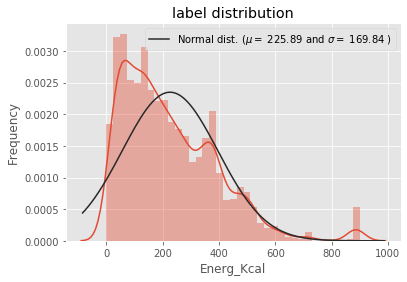

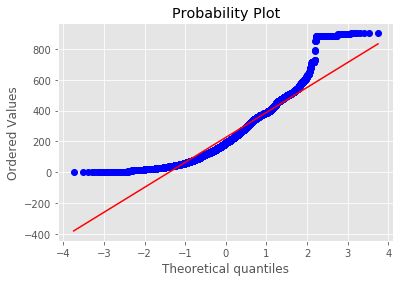

In [71]:
sns.distplot(data[label] , fit=norm);

(mu, sigma) = norm.fit(data[label])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('label distribution')

fig = plt.figure()
res = stats.probplot(data[label], plot=plt)
plt.show()

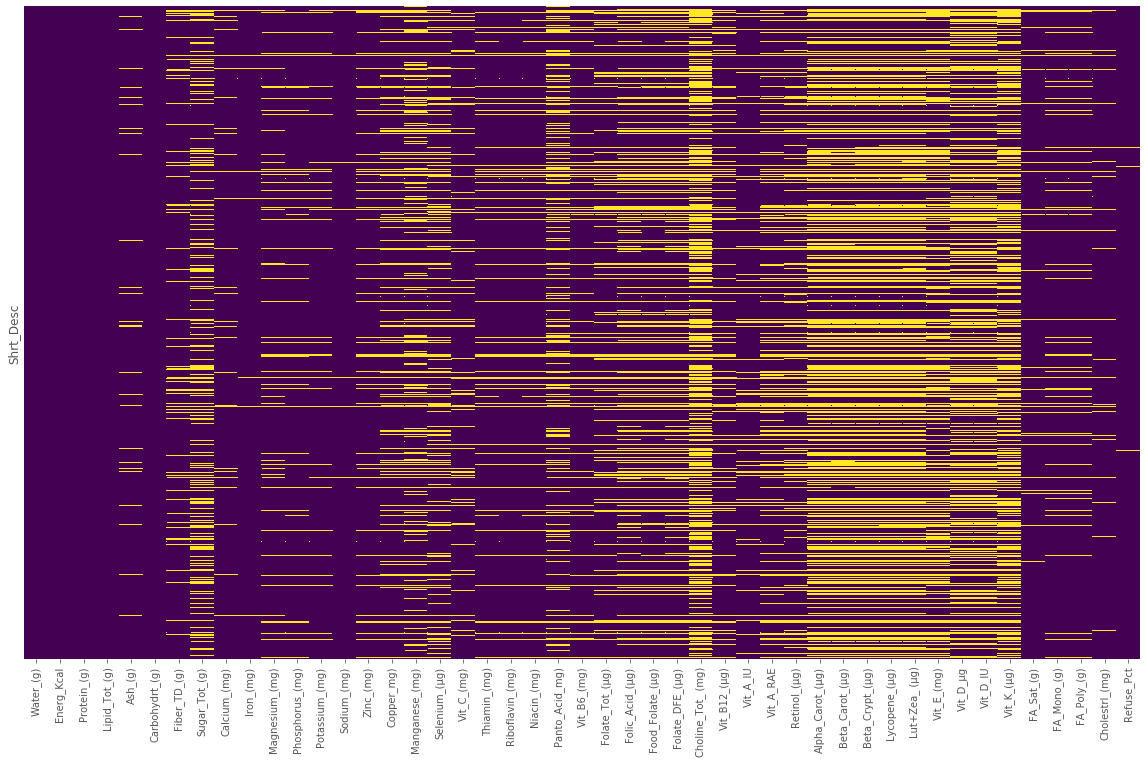

In [72]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

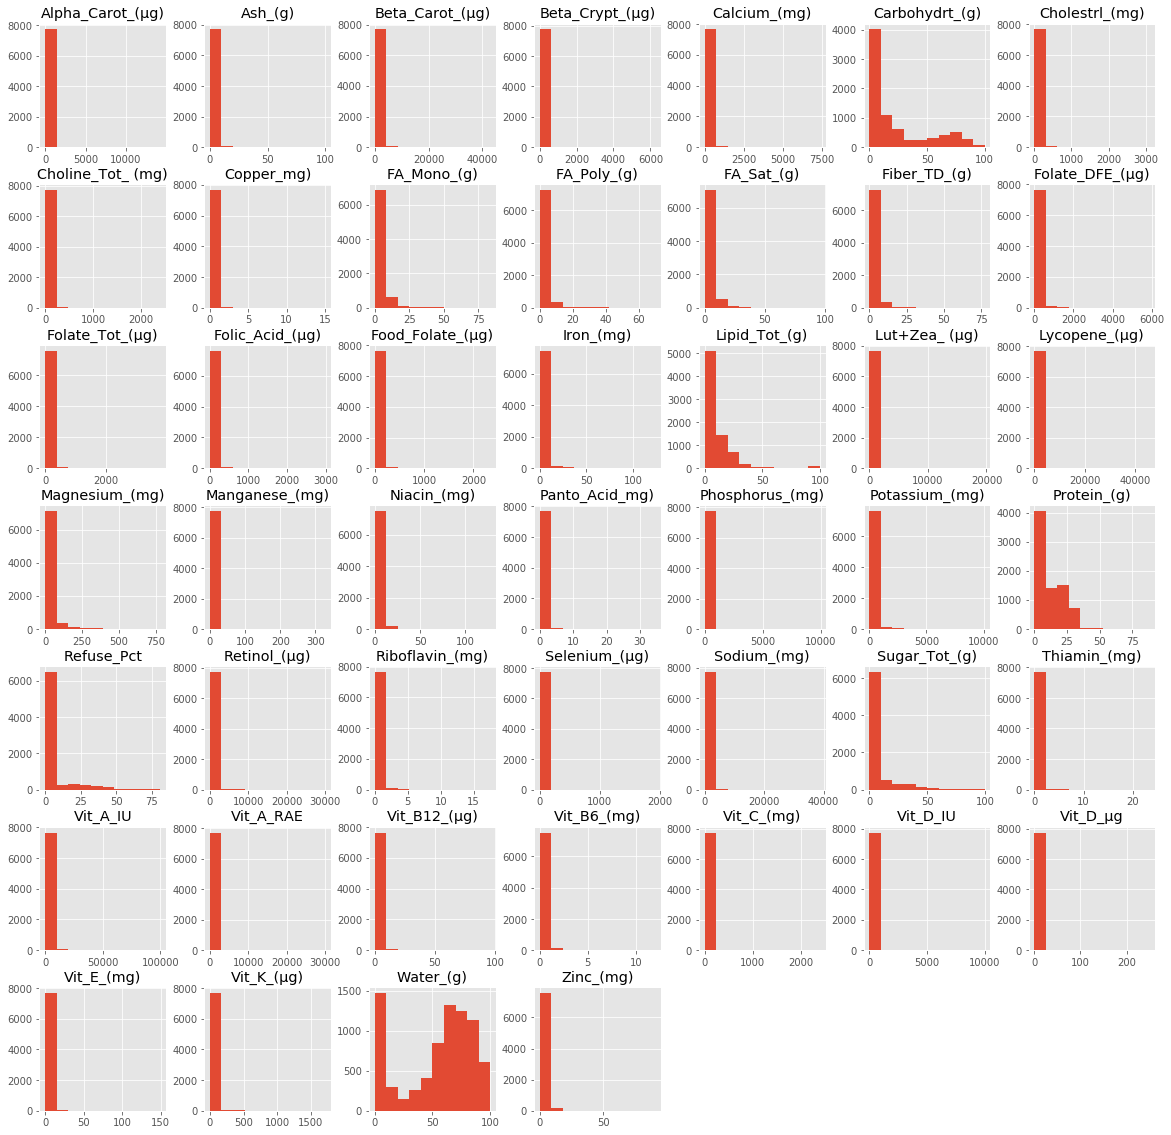

In [73]:
data.fillna(0, inplace = True)
data[real_vars].hist(figsize=(20, 20));

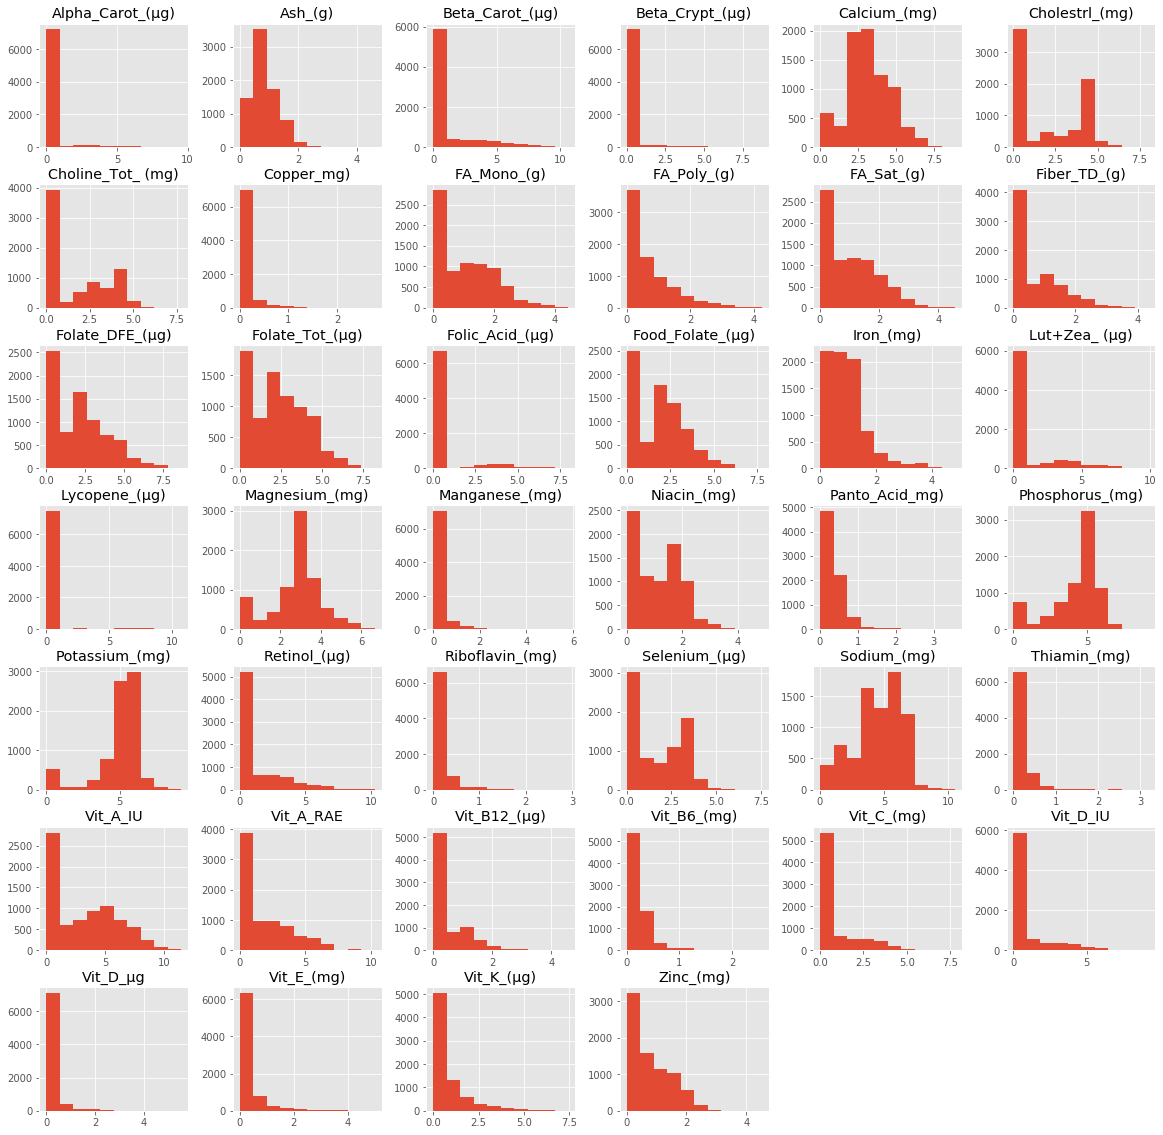

In [76]:
vars_to_log = [
            'Zinc_(mg)',
            'Manganese_(mg)',
            'Niacin_(mg)',
            'Potassium_(mg)',
            'Sodium_(mg)',
            'Folic_Acid_(µg)',
            'Fiber_TD_(g)',
            'Alpha_Carot_(µg)',
            'Copper_mg)',
            'Retinol_(µg)',
            'FA_Mono_(g)',
            'Vit_K_(µg)',
            'Selenium_(µg)',
            'Phosphorus_(mg)',
            'Vit_D_µg',
            'Panto_Acid_mg)',
            'Iron_(mg)',
            'Ash_(g)',
            'Lycopene_(µg)',
            'Vit_A_RAE',
            'Vit_C_(mg)',
            'Vit_A_IU',
            'Beta_Carot_(µg)',
            'Vit_D_IU',
            'Calcium_(mg)',
            'Cholestrl_(mg)',
            'Magnesium_(mg)',
            'Vit_E_(mg)',
            'FA_Sat_(g)',
            'Folate_DFE_(µg)',
            'Vit_B6_(mg)',
            'FA_Poly_(g)',
            'Choline_Tot_ (mg)',
            'Lut+Zea_ (µg)',
            'Thiamin_(mg)',
            'Folate_Tot_(µg)',
            'Food_Folate_(µg)',
            'Riboflavin_(mg)',
            'Vit_B12_(µg)',
            'Beta_Crypt_(µg)',
]
data[vars_to_log] = data[vars_to_log].apply(lambda w: np.log(w + 1))
real_vars_hist = data[vars_to_log].hist(figsize=(20, 20))

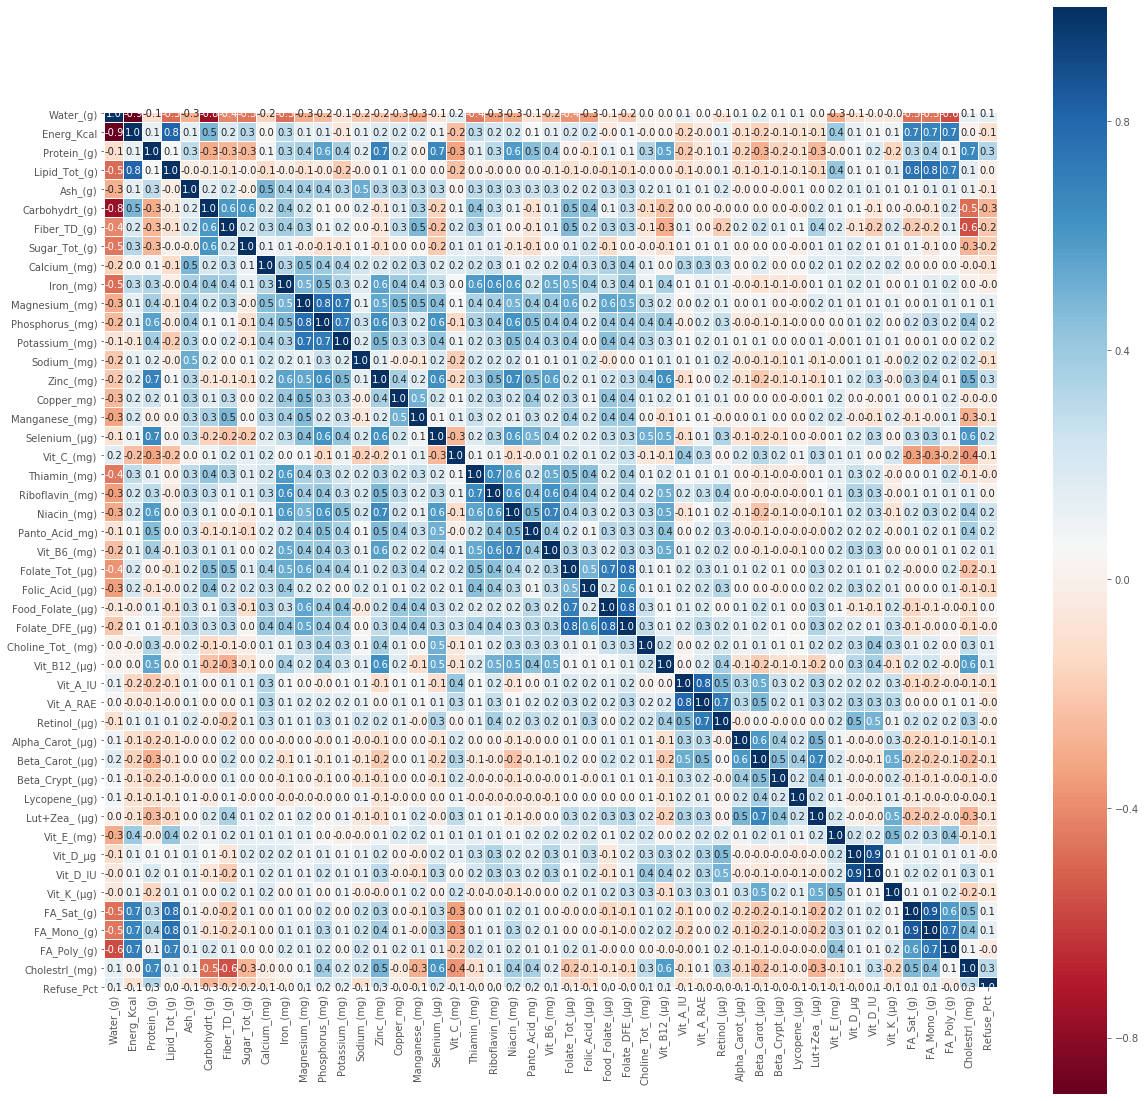

In [78]:
plt.figure(figsize=(20,20))
corr = data.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

In [79]:
remove_list = []
for i,c in enumerate(corr['Energ_Kcal']):
    if((abs(c) < 0.15) and (not(corr.index[i] in ['Refuse_Pct', 'Protein_(g)']))):
        remove_list.append(corr.index[i])
remove_list

['Ash_(g)',
 'Calcium_(mg)',
 'Magnesium_(mg)',
 'Phosphorus_(mg)',
 'Potassium_(mg)',
 'Sodium_(mg)',
 'Selenium_(µg)',
 'Panto_Acid_mg)',
 'Vit_B6_(mg)',
 'Food_Folate_(µg)',
 'Folate_DFE_(µg)',
 'Choline_Tot_ (mg)',
 'Vit_B12_(µg)',
 'Vit_A_RAE',
 'Retinol_(µg)',
 'Alpha_Carot_(µg)',
 'Beta_Crypt_(µg)',
 'Lycopene_(µg)',
 'Lut+Zea_ (µg)',
 'Vit_D_µg',
 'Vit_D_IU',
 'Vit_K_(µg)',
 'Cholestrl_(mg)']

In [80]:
data.drop(columns=remove_list, inplace=True, axis=0)


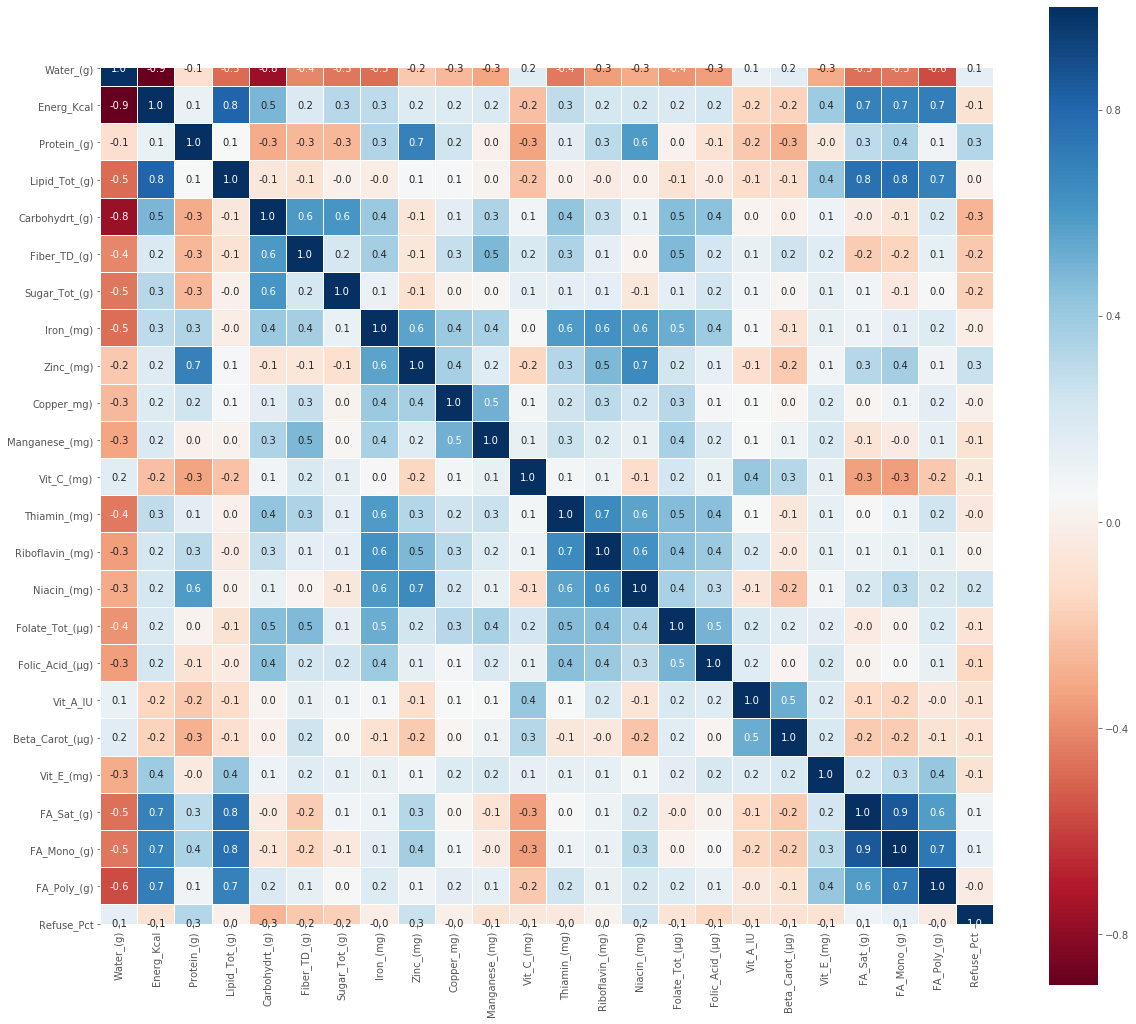

In [81]:
plt.figure(figsize=(20,18))
corr = data.corr() 
sns.heatmap(corr, annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

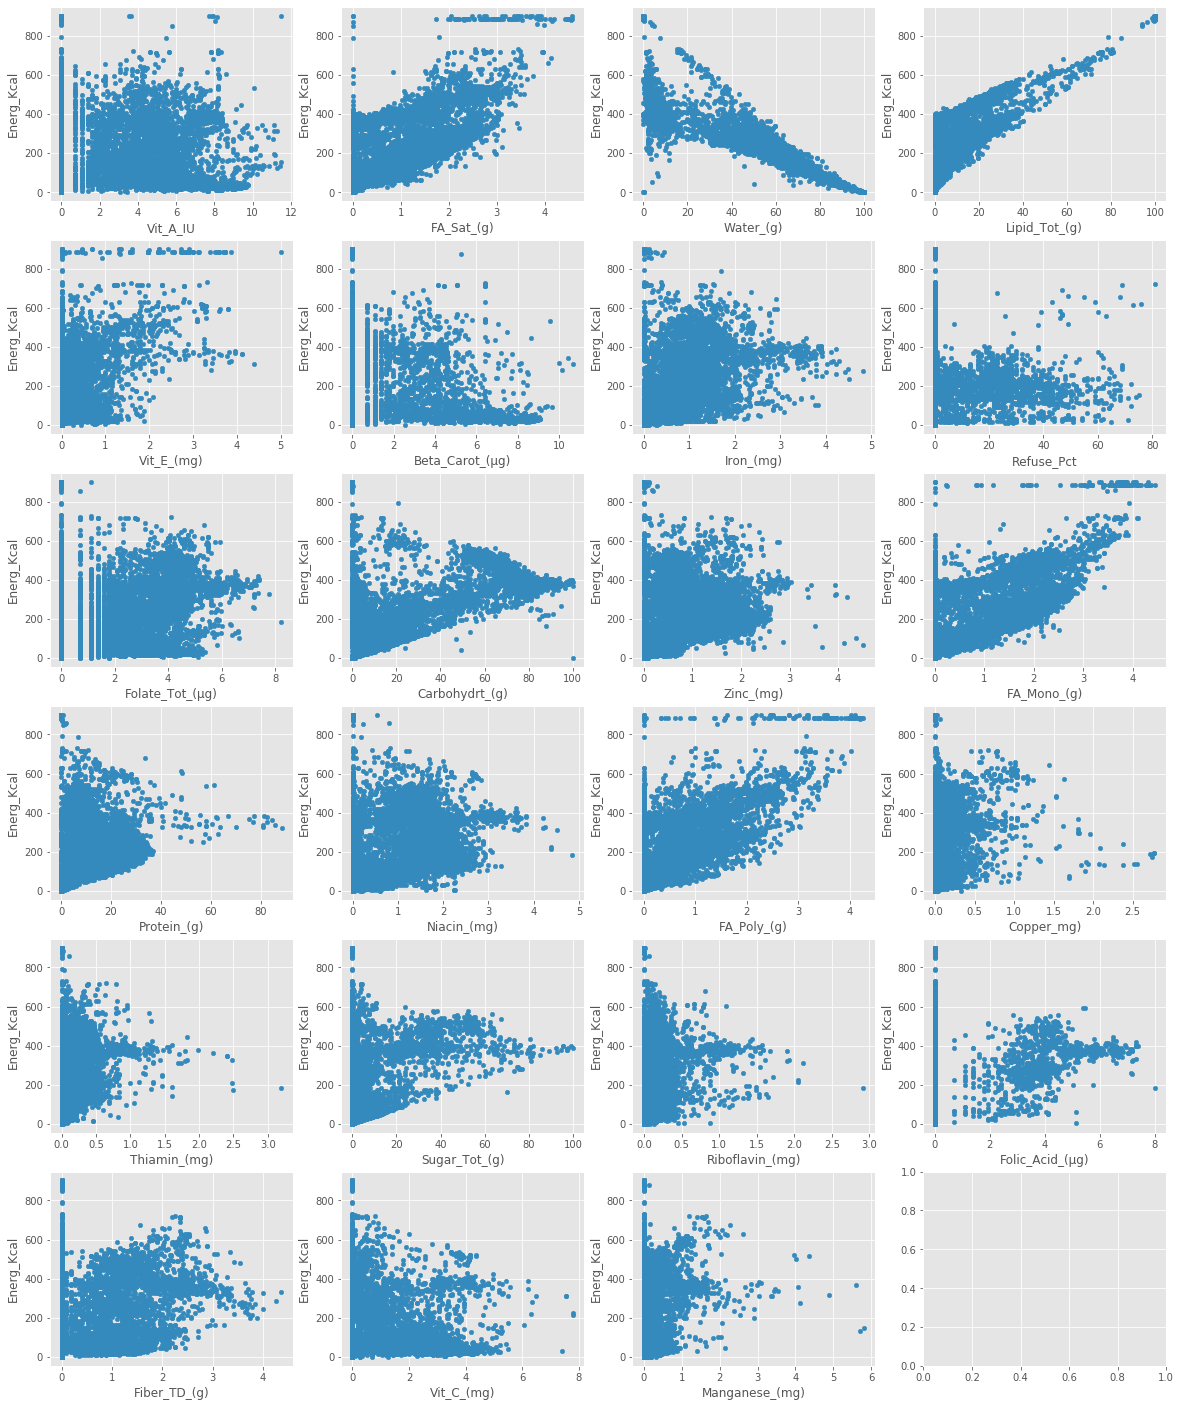

In [85]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 25))

for i, feature in enumerate((list(set(real_vars) - set(remove_list))) ):
    data.plot(feature, label, subplots=True, kind="scatter", ax=axes[i // 4, i % 4])

In [86]:
y = data[label]
x = data.drop(columns = [label])

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [89]:
# from sklearn.linear_model import ElasticNet
# model = ElasticNet(random_state=0)
# param_grid = {
#     'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10, 20,50,100],
#     'l1_ratio':[0,0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1]
# }
# grid_cv_lasso = GridSearchCV(model, param_grid, cv = 5, scoring='neg_mean_absolute_error')

# grid_cv_lasso.fit(x_train, y_train)

In [90]:
# from sklearn.linear_model import Lasso
# model = Lasso(random_state=0, max_iter= 10000)
# param_grid = {
#     'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10, 20,50,100],
# }
# grid_cv_lasso = GridSearchCV(model, param_grid, cv = 5, scoring='neg_mean_absolute_error')

# grid_cv_lasso.fit(x_train, y_train)

In [91]:
# print('Лучшее значение параметра:', grid_cv_lasso.best_params_)
# print('Лучшее качество:', grid_cv_lasso.best_score_)

In [92]:
# from sklearn.metrics import mean_absolute_error as mae
# from sklearn.metrics import max_error
# y_pred = grid_cv_lasso.best_estimator_.predict(x_test)
# print(mae(y_test, y_pred))
# print(max_error(y_test, y_pred))


In [93]:
# predictions = []
# for i, row in enumerate(y_test):
#     predictions.append({
#         'elem': data.loc[y_test.index[i]],
#         'test': row,
#         'pred': y_pred[i],
#         'mae': abs(y_test[i] - y_pred[i])
#                        })


In [94]:
# top_err = sorted(predictions, key = lambda o: o['mae'])
# top_err.reverse()

# top_err[:10]

In [95]:
# plt.scatter(y_test, y_pred)
# plt.xlabel('Истинные значения')
# plt.ylabel('Предсказанные значения')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot([-100, 100], [-100, 100])

In [96]:

# featureImportance = pd.DataFrame({"feature": x_test.columns,  "importance": grid_cv_lasso.best_estimator_.coef_})
# featureImportance.set_index('feature', inplace=True)
# featureImportance.sort_values(["importance"], ascending=False, inplace=True)
# featureImportance.plot.bar()

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import max_error

# Объявили лес из 10 деревьев 
rf = RandomForestRegressor(n_estimators=10, criterion='mae')

# Обучили лес 
rf.fit(x_train, y_train)

# Сделали по лесу прогнозы 
y_pred_forest = rf.predict(x_test)

In [98]:
mae(y_test, y_pred_forest)

6.3282216494845365

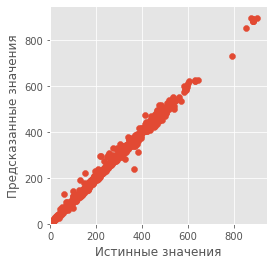

In [99]:
plt.scatter(y_test, y_pred_forest)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

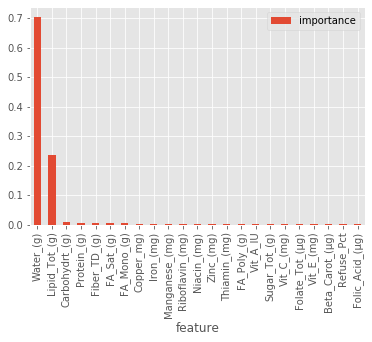

In [100]:
featureImportance = pd.DataFrame({"feature": data.drop(columns = [label]).columns,  "importance": rf.feature_importances_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance.plot.bar()

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = data[label]
x = data[['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']]

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

rf = RandomForestRegressor(n_estimators=100, criterion='mse')

# Обучили лес 
rf.fit(x_train, y_train)

# Сделали по лесу прогнозы 
y_pred_forest = rf.predict(x_test)
mae(y_test, y_pred_forest)

7.2458800335887465

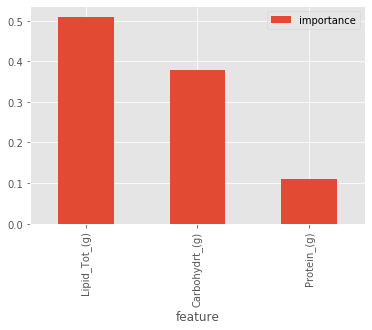

In [102]:
featureImportance = pd.DataFrame({"feature": data[['Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)']].columns,  "importance": rf.feature_importances_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance.plot.bar()